[0.9541199999999975, 0.944919999999998, 0.958199999999998, 0.954359999999998, 0.9586399999999987, 0.9571199999999986, 0.9622000000000003, 0.9603999999999986, 0.9629599999999995, 0.9615999999999989, 0.9651999999999987, 0.9627199999999985, 0.9667199999999994, 0.9597599999999987, 0.9616399999999993, 0.9581599999999997, 0.957079999999999, 0.9511199999999981, 0.9546799999999981, 0.9484399999999987]


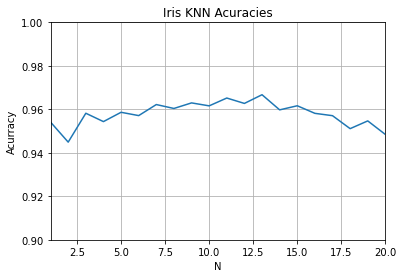

In [102]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

def length(X, y):
    empty_list = []
    
    return empty_list

#read and tag data from iris.data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
#assign data tags to integers b/c knc seems to need this
iris["Species_number"] = iris.species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 })
#assign features descriptions
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.Species_number
#variables to hold abvg accuracies and number of loops/K values
acuracieslist = []
bigloop = 20
sLoop = 500
for n in range(1,bigloop+1):
    avgAcuracy = 0
    #repeate test ssLoop times and calculate avg accuracy
    for x in range(1,sLoop+1):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=random.randint(1,100))
        knn = KNeighborsClassifier(n_neighbors=(n))
        knn.fit(X_train, y_train)
        y_pred_class = knn.predict(X_test)
        avgAcuracy += (metrics.accuracy_score(y_test, y_pred_class))
    acuracieslist.append(avgAcuracy/sLoop)

print(acuracieslist)
#plot stuff!
plt.title('Iris KNN Acuracies')
plt.ylabel('Acurracy')
plt.xlabel('N')
plt.grid(True)
plt.xlim((1,20))
plt.ylim((.9,1))
plt.plot(range(1,bigloop+1), acuracieslist)
plt.show()
